In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# load data
names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                header=None,delim_whitespace=True,names=names,na_values='?')
df = df.dropna()
x=df['horsepower'].values
y=df['mpg'].values

C:\Users\ethan\AppData\Local\Temp\ipykernel_22588\2388870743.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',


In [17]:
# set up the model
lam=100
z1=np.ones_like(x)
z2=x
z3=np.where(x>=lam,x-lam,0)
X=np.column_stack([z1,z2,z3])

# calculate the weight
beta=np.linalg.inv(X.T@X)@(X.T@y)
a1= beta[0]
s1= beta[1]
s2= beta[1]+beta[2]

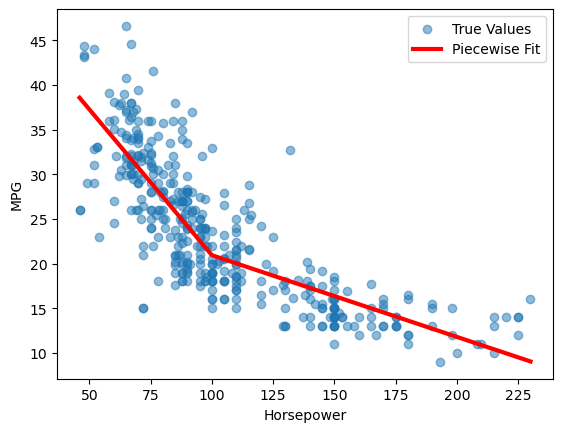

In [18]:
# plot
plt.scatter(x,y,alpha=0.5,label='True Values')
x_plot=np.linspace(min(x),max(x),500)
y_plot=np.where(
    x_plot<lam,
    a1+s1*x_plot,
    a1+s1*lam-s2*lam+s2*x_plot
)
plt.plot(x_plot,y_plot,label='Piecewise Fit',color='red',linewidth=3)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()

